In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("3_churn_Modelling.csv")

In [3]:
df.shape

(10000, 14)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [5]:
# separate features and target value 

x = df[["CreditScore",	"Age",	"Tenure",	"Balance",	"NumOfProducts"	,"HasCrCard","IsActiveMember","EstimatedSalary"	]]
y = df["Exited"]

<Axes: xlabel='Exited', ylabel='count'>

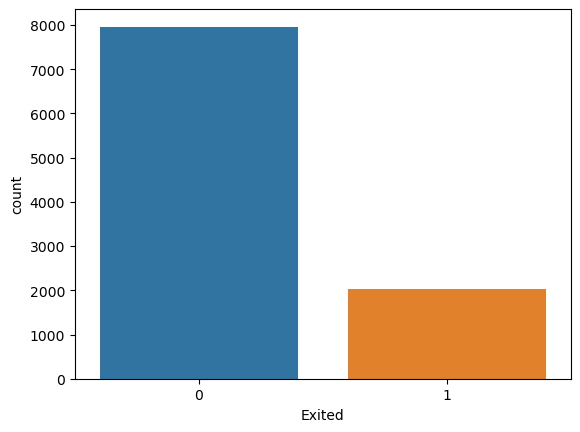

In [6]:
sns.countplot(x=y)

In [7]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
# Normalize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
x_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [10]:
# split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0, test_size=0.25)

In [11]:
X_train.shape

(7500, 8)

In [12]:
X_test.shape

(2500, 8)

In [13]:
#  ANN from sklearn 

from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=(100,100,100),
                   random_state=0,
                   max_iter=100,
                   activation='relu')

ann.fit(X_train, y_train)

C:\Users\yashs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [14]:
y_pred = ann.predict(X_test)

In [15]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
y_test.value_counts()

Exited
0    1991
1     509
Name: count, dtype: int64

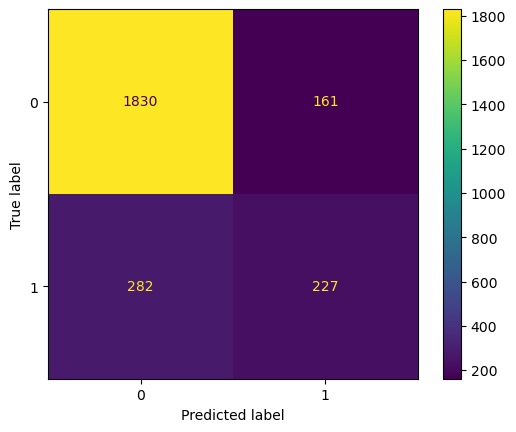

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report,confusion_matrix

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [18]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Accuracy: 0.8228
Confusion Matrix:
 [[1830  161]
 [ 282  227]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1991
           1       0.59      0.45      0.51       509

    accuracy                           0.82      2500
   macro avg       0.73      0.68      0.70      2500
weighted avg       0.81      0.82      0.81      2500



In [19]:
# improvements

In [20]:
# Balance the imbalanced class

!pip install imbalanced-learn

In [21]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
x_res, y_res = ros.fit_resample(x,y)

In [22]:
x_res.shape

(15926, 8)

In [23]:
# Normalize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_res)

In [24]:
x_scaled

array([[-0.29877723,  0.08418894, -1.01840607, ...,  0.6512495 ,
         1.08223556,  0.00817382],
       [-0.4103938 , -0.01032629, -1.36135608, ..., -1.53550983,
         1.08223556,  0.20261687],
       [-1.48597169,  0.08418894,  1.03929402, ...,  0.6512495 ,
        -0.92401325,  0.22674468],
       ...,
       [-0.84671313,  1.02934128,  0.01044398, ...,  0.6512495 ,
        -0.92401325,  1.28878188],
       [-0.96847667,  0.65128034, -0.67545605, ..., -1.53550983,
         1.08223556, -1.21851316],
       [-1.5874413 ,  0.74579558,  1.03929402, ...,  0.6512495 ,
         1.08223556,  1.42417217]])

In [25]:
# split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_res, random_state=0, test_size=0.25)

In [26]:
X_train.shape

(11944, 8)

In [27]:
X_test.shape

(3982, 8)

In [28]:
#  ANN from sklearn 

from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=(100,100,100),
                   random_state=0,
                   max_iter=100,
                   activation='relu')

ann.fit(X_train, y_train)

C:\Users\yashs\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [29]:
y_pred = ann.predict(X_test)


In [30]:
y_test.value_counts()

Exited
1    2001
0    1981
Name: count, dtype: int64

In [31]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

print(classification_report(y_test, y_pred))

Accuracy: 0.865143144148669
Confusion Matrix:
 [[1630  351]
 [ 186 1815]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1981
           1       0.84      0.91      0.87      2001

    accuracy                           0.87      3982
   macro avg       0.87      0.86      0.86      3982
weighted avg       0.87      0.87      0.86      3982



In [33]:
# recall for 1(exited ) has increased after oversampling !!👍